# 🚀 Complete LLM Finetuning Tutorial - Master Notebook

**Everything you need to learn LLM finetuning in ONE notebook!**

This comprehensive notebook covers:
1. ✅ Environment Setup
2. ✅ Data Exploration (Multiple Datasets)
3. ✅ Baseline Evaluation
4. ✅ Full Finetuning (GPT-2)
5. ✅ LoRA Finetuning (Parameter-Efficient)
6. ✅ QLoRA (7B Model on 8GB GPU!)
7. ✅ Instruction Tuning (ChatGPT-style)
8. ✅ Text Classification (BERT)
9. ✅ Model Comparison & Evaluation

**Total Time:** 2-4 hours (depending on what you run)

**Just run cells sequentially - no notebook switching required!**

---

## 📋 Table of Contents

**Click "Runtime" → "Run all" to execute everything!**

Or run sections individually:
- Part 1: Setup (5 min)
- Part 2: Data Exploration (10 min)
- Part 3: Baseline Evaluation (10 min)
- Part 4: Full Finetuning GPT-2 (30-45 min)
- Part 5: LoRA Finetuning (20-30 min)
- Part 6: QLoRA on Mistral-7B (40-60 min) ⭐
- Part 7: Instruction Tuning (30-45 min) ⭐
- Part 8: Text Classification (20-30 min)
- Part 9: Evaluation & Comparison (15 min)
- Part 10: Summary & Next Steps

---

# Part 1: Environment Setup (5 minutes)

Setting up Google Colab environment for LLM finetuning.

In [1]:
# Clone repository
!git clone https://github.com/DS535/llm-finetuning-production.git
%cd llm-finetuning-production

print("✓ Repository cloned")

Cloning into 'llm-finetuning-production'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 63 (delta 22), reused 60 (delta 19), pack-reused 0 (from 0)
Receiving objects: 100% (63/63), 59.37 KiB | 9.89 MiB/s, done.
Resolving deltas: 100% (22/22), done.
/content/llm-finetuning-production
✓ Repository cloned


In [2]:
# Check GPU
!nvidia-smi

import torch
print(f"\nPyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"CUDA version: {torch.version.cuda}")
    total_mem = torch.cuda.get_device_properties(0).total_memory / 1024**3
    print(f"Total GPU Memory: {total_mem:.2f} GB")

Wed Jan  7 15:31:06 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
# Install dependencies (5-10 minutes)
print("Installing dependencies... This will take 5-10 minutes.")
!pip install -q -r requirements.txt
print("\n✓ All dependencies installed!")

Installing dependencies... This will take 5-10 minutes.
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.9/518.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 91.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.5/253.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
# Mount Google Drive (for saving checkpoints)
from google.colab import drive
drive.mount('/content/drive')

import os
os.makedirs("/content/drive/MyDrive/llm_checkpoints", exist_ok=True)
os.makedirs("/content/drive/MyDrive/llm_models", exist_ok=True)
print("✓ Google Drive mounted")
print("  Checkpoints: /content/drive/MyDrive/llm_checkpoints")
print("  Models: /content/drive/MyDrive/llm_models")

Mounted at /content/drive
✓ Google Drive mounted
  Checkpoints: /content/drive/MyDrive/llm_checkpoints
  Models: /content/drive/MyDrive/llm_models


In [6]:
# Verify all libraries
import transformers
import datasets
import peft
import trl
import bitsandbytes as bnb
import accelerate

print("Library Versions:")
print(f"  transformers: {transformers.__version__}")
print(f"  datasets: {datasets.__version__}")
print(f"  peft: {peft.__version__}")
print(f"  trl: {trl.__version__}")
print(f"  bitsandbytes: {bnb.__version__}")
print(f"  accelerate: {accelerate.__version__}")
print(f"  torch: {torch.__version__}")
print("\n✓ Setup complete! Ready for finetuning!")

Library Versions:
  transformers: 4.57.3
  datasets: 4.0.0
  peft: 0.18.0
  trl: 0.26.2
  bitsandbytes: 0.49.0
  accelerate: 1.12.0
  torch: 2.9.0+cu126

✓ Setup complete! Ready for finetuning!


In [7]:
# Add project to path
import sys
sys.path.append('/content/llm-finetuning-production')

# Test custom utilities
from src.utils.memory import print_gpu_utilization

print("\n=== Initial GPU Memory ===")
print_gpu_utilization()
print("\n✓ Custom utilities loaded")


=== Initial GPU Memory ===
GPU 0 Memory Status:
  Allocated: 0.00 GB
  Reserved:  0.00 GB
  Max Allocated: 0.00 GB
  Total:     14.74 GB
  Usage:     0.0%

✓ Custom utilities loaded


---
# Part 2: Data Exploration (10 minutes)

Loading and analyzing datasets for different finetuning tasks.

In [8]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Visualization libraries loaded")

✓ Visualization libraries loaded


In [9]:
# Load Dolly-15k (Instruction Following Dataset)
print("Loading Dolly-15k instruction dataset...")
dolly = load_dataset("databricks/databricks-dolly-15k", split="train")

print(f"\nDataset size: {len(dolly):,} instruction-response pairs")
print(f"Columns: {dolly.column_names}")
print(f"\n📝 Example instruction:")
print(f"Category: {dolly[0]['category']}")
print(f"Instruction: {dolly[0]['instruction']}")
print(f"Response: {dolly[0]['response'][:200]}...")

Loading Dolly-15k instruction dataset...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

databricks-dolly-15k.jsonl:   0%|          | 0.00/13.1M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/15011 [00:00<?, ? examples/s]


Dataset size: 15,011 instruction-response pairs
Columns: ['instruction', 'context', 'response', 'category']

📝 Example instruction:
Category: closed_qa
Instruction: When did Virgin Australia start operating?
Response: Virgin Australia commenced services on 31 August 2000 as Virgin Blue, with two aircraft on a single route....


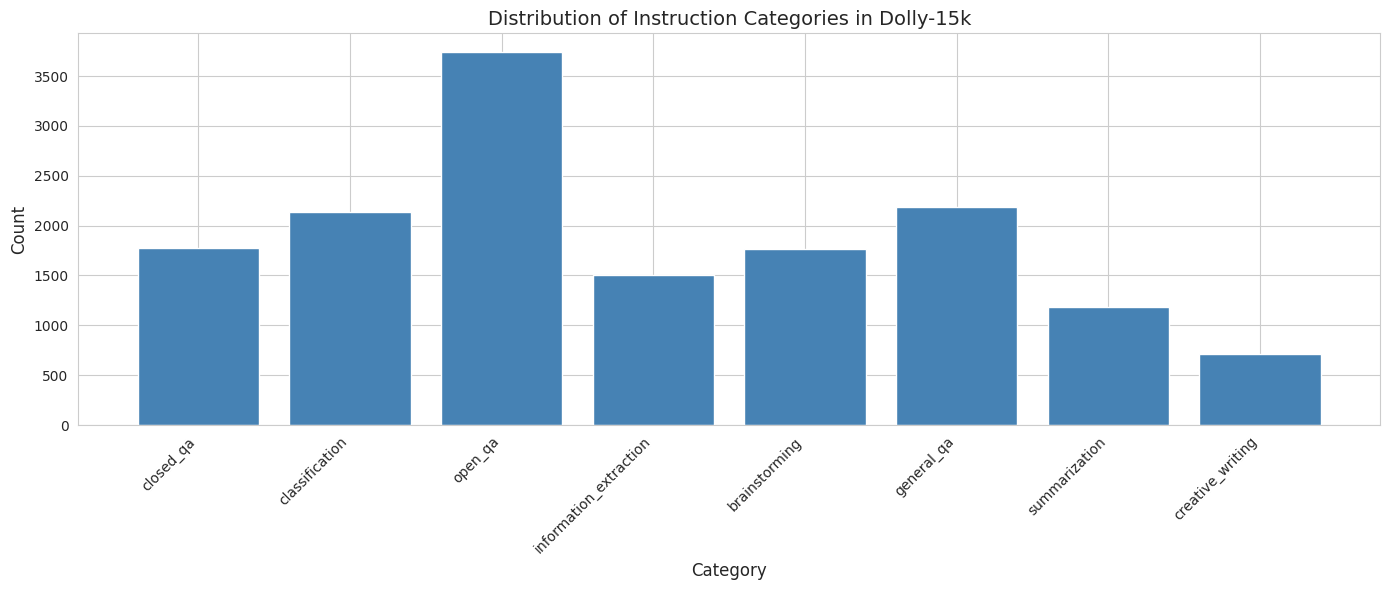


Category breakdown:
  open_qa                       : 3,742 ( 24.9%)
  general_qa                    : 2,191 ( 14.6%)
  classification                : 2,136 ( 14.2%)
  closed_qa                     : 1,773 ( 11.8%)
  brainstorming                 : 1,766 ( 11.8%)
  information_extraction        : 1,506 ( 10.0%)
  summarization                 : 1,188 (  7.9%)
  creative_writing              :   709 (  4.7%)


In [10]:
# Analyze instruction categories
categories = Counter(dolly['category'])

plt.figure(figsize=(14, 6))
plt.bar(categories.keys(), categories.values(), color='steelblue')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Instruction Categories in Dolly-15k', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nCategory breakdown:")
for cat, count in categories.most_common():
    pct = count / len(dolly) * 100
    print(f"  {cat:30s}: {count:5,} ({pct:5.1f}%)")

Loading tokenizer for analysis...


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1055 > 1024). Running this sequence through the model will result in indexing errors



Analyzing token counts (sampling 1000 examples)...


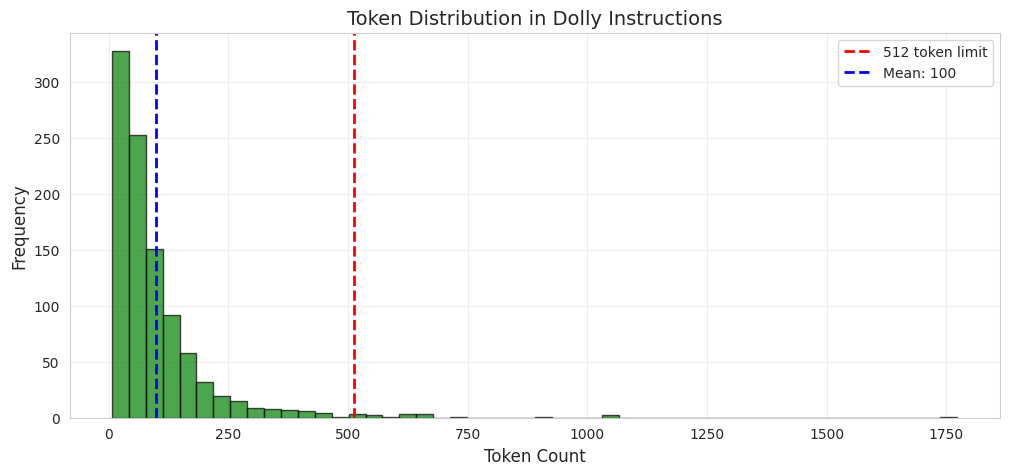


Token statistics:
  Mean: 99.7 tokens
  Median: 63.0 tokens
  Max: 1773 tokens
  % over 512 tokens: 1.7%

💡 Recommendation: Use max_length=512 for training


In [11]:
# Tokenization analysis
from transformers import AutoTokenizer

print("Loading tokenizer for analysis...")
tokenizer = AutoTokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token

# Analyze token counts on sample
print("\nAnalyzing token counts (sampling 1000 examples)...")
sample = dolly.select(range(min(1000, len(dolly))))
token_counts = [
    len(tokenizer.encode(ex['instruction'] + ' ' + ex['response']))
    for ex in sample
]

plt.figure(figsize=(12, 5))
plt.hist(token_counts, bins=50, edgecolor='black', color='green', alpha=0.7)
plt.axvline(512, color='red', linestyle='--', linewidth=2, label='512 token limit')
plt.axvline(np.mean(token_counts), color='blue', linestyle='--', linewidth=2, label=f'Mean: {np.mean(token_counts):.0f}')
plt.xlabel('Token Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Token Distribution in Dolly Instructions', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

pct_over_512 = sum(1 for x in token_counts if x > 512) / len(token_counts) * 100
print(f"\nToken statistics:")
print(f"  Mean: {np.mean(token_counts):.1f} tokens")
print(f"  Median: {np.median(token_counts):.1f} tokens")
print(f"  Max: {max(token_counts)} tokens")
print(f"  % over 512 tokens: {pct_over_512:.1f}%")
print(f"\n💡 Recommendation: Use max_length=512 for training")

Loading AG News classification dataset...


train.jsonl:   0%|          | 0.00/33.8M [00:00<?, ?B/s]

test.jsonl:   0%|          | 0.00/2.13M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]


Dataset size: 120,000 news articles
Classes: 4

📰 Example article:
Label: Business
Text: Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again....


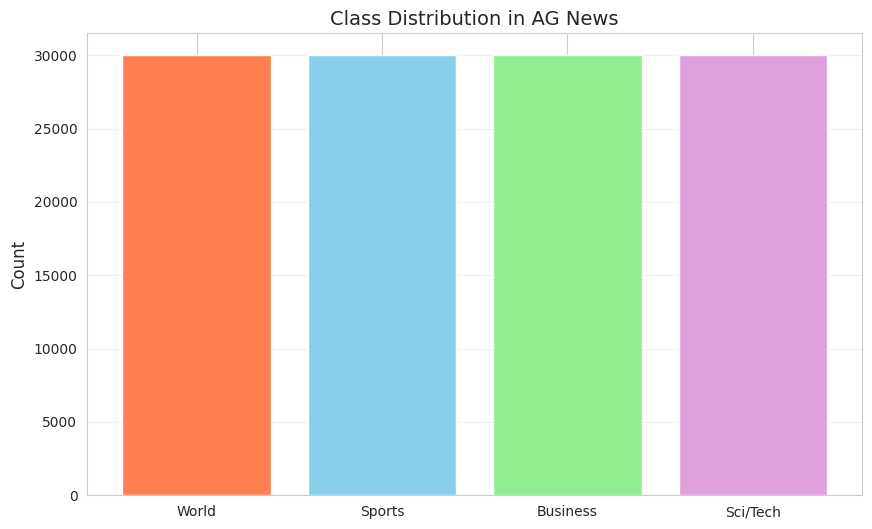


Class balance:
  World     : 30,000 (25.0%)
  Sports    : 30,000 (25.0%)
  Business  : 30,000 (25.0%)
  Sci/Tech  : 30,000 (25.0%)

✓ Data exploration complete!


In [12]:
# Load AG News (Classification Dataset)
print("Loading AG News classification dataset...")
ag_news = load_dataset("SetFit/ag_news", split="train")

label_names = ['World', 'Sports', 'Business', 'Sci/Tech']
label_counts = Counter(ag_news['label'])

print(f"\nDataset size: {len(ag_news):,} news articles")
print(f"Classes: {len(label_names)}")
print(f"\n📰 Example article:")
print(f"Label: {label_names[ag_news[0]['label']]}")
print(f"Text: {ag_news[0]['text'][:200]}...")

# Visualize class distribution
plt.figure(figsize=(10, 6))
plt.bar([label_names[i] for i in sorted(label_counts.keys())],
        [label_counts[i] for i in sorted(label_counts.keys())],
        color=['coral', 'skyblue', 'lightgreen', 'plum'])
plt.ylabel('Count', fontsize=12)
plt.title('Class Distribution in AG News', fontsize=14)
plt.grid(True, axis='y', alpha=0.3)
plt.show()

print("\nClass balance:")
for i in sorted(label_counts.keys()):
    count = label_counts[i]
    print(f"  {label_names[i]:10s}: {count:6,} ({count/len(ag_news)*100:.1f}%)")

print("\n✓ Data exploration complete!")

---
# Part 3: Baseline Evaluation (10 minutes)

Evaluating pretrained models before finetuning to establish baselines.

In [13]:
from transformers import AutoModelForCausalLM
from tqdm import tqdm

print("Loading GPT-2 for baseline evaluation...")
model = AutoModelForCausalLM.from_pretrained("gpt2").to("cuda")

print(f"\nModel: GPT-2")
print(f"Parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"Size: ~500 MB")

print_gpu_utilization()

Loading GPT-2 for baseline evaluation...


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]


Model: GPT-2
Parameters: 124,439,808
Size: ~500 MB
GPU 0 Memory Status:
  Allocated: 0.48 GB
  Reserved:  0.53 GB
  Max Allocated: 0.48 GB
  Total:     14.74 GB
  Usage:     3.2%


In [14]:
# Test zero-shot generation
test_prompts = [
    "The capital of France is",
    "To learn Python programming, you should",
    "The best way to stay healthy is",
    "Artificial intelligence will",
    "The future of transportation"
]

print("=" * 60)
print("ZERO-SHOT GENERATION (Before Finetuning)")
print("=" * 60)

model.eval()
for i, prompt in enumerate(test_prompts, 1):
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
    outputs = model.generate(
        **inputs,
        max_length=60,
        do_sample=True,
        temperature=0.7,
        top_p=0.9
    )
    generated = tokenizer.decode(outputs[0])

    print(f"\n{i}. Prompt: \"{prompt}\"")
    print(f"   Output: {generated}")
    print("-" * 60)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


ZERO-SHOT GENERATION (Before Finetuning)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



1. Prompt: "The capital of France is"
   Output: The capital of France is the capital of the country.

In France, the people of the country, which is a minority of the population, are the minority. They are the majority in the country.

The people of France, who are minorities, are the minority.

The
------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



2. Prompt: "To learn Python programming, you should"
   Output: To learn Python programming, you should have at least some familiarity with programming languages. In this article, we will cover how to learn Python programming.

The basics

Python is a programming language that is used in many different industries. The main use case is in web design, in computer science
------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



3. Prompt: "The best way to stay healthy is"
   Output: The best way to stay healthy is to eat. It's the first thing that comes to mind.

"I think it's important to think about what you're eating and what you're eating with a healthy mind. It's not that you're eating the right things or you're eating the
------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



4. Prompt: "Artificial intelligence will"
   Output: Artificial intelligence will be used to help us understand the human brain and understand how we can solve problems," said Dr. M. P. O'Donnell, a postdoctoral researcher at the University of Chicago who is leading the research.

The idea of artificial intelligence may be more than a new
------------------------------------------------------------

5. Prompt: "The future of transportation"
   Output: The future of transportation is uncertain and many cities are trying to figure out how to make it safer.

"What we're trying to do is to get them to start taking the lessons learned from the New York City subway system," said Michael T. Sorenson, a professor of transportation and
------------------------------------------------------------


In [15]:
# Compute baseline perplexity
print("\nComputing baseline perplexity on Dolly responses...")

test_texts = [ex['response'] for ex in dolly.select(range(100))]

total_loss = 0
total_tokens = 0

with torch.no_grad():
    for text in tqdm(test_texts, desc="Computing perplexity"):
        enc = tokenizer(text, return_tensors="pt", truncation=True, max_length=512).to("cuda")
        outputs = model(**enc, labels=enc["input_ids"])
        total_loss += outputs.loss.item() * enc["input_ids"].size(1)
        total_tokens += enc["input_ids"].size(1)

baseline_perplexity = np.exp(total_loss / total_tokens)

print(f"\n📊 Baseline Perplexity: {baseline_perplexity:.2f}")
print("   (Lower is better - measures how well model predicts text)")

# Clean up
del model
torch.cuda.empty_cache()
print("\n✓ Baseline evaluation complete!")


Computing baseline perplexity on Dolly responses...


Computing perplexity: 100%|██████████| 100/100 [00:02<00:00, 46.78it/s]



📊 Baseline Perplexity: 25.57
   (Lower is better - measures how well model predicts text)

✓ Baseline evaluation complete!


---
# Part 4: Full Finetuning - GPT-2 (30-45 minutes)

Traditional full-parameter finetuning on TinyStories dataset.

In [29]:
from transformers import Trainer, TrainingArguments, DataCollatorForLanguageModeling

print("Preparing for full finetuning...")

# Load fresh model
model = AutoModelForCausalLM.from_pretrained("gpt2")
print(f"Model loaded: {sum(p.numel() for p in model.parameters()):,} parameters")

# Load TinyStories dataset (small subset for quick training)
print("\nLoading TinyStories dataset...")
tiny_stories = load_dataset("roneneldan/TinyStories", split="train[:5000]")
tiny_split = tiny_stories.train_test_split(test_size=0.1, seed=42)

print(f"Train examples: {len(tiny_split['train']):,}")
print(f"Val examples: {len(tiny_split['test']):,}")
print(f"\nExample story:\n{tiny_split['train'][0]['text'][:300]}...")

Preparing for full finetuning...
Model loaded: 124,439,808 parameters

Loading TinyStories dataset...


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00004-2d5a1467fff108(…):   0%|          | 0.00/249M [00:00<?, ?B/s]

data/train-00001-of-00004-5852b56a2bd28f(…):   0%|          | 0.00/248M [00:00<?, ?B/s]

data/train-00002-of-00004-a26307300439e9(…):   0%|          | 0.00/246M [00:00<?, ?B/s]

data/train-00003-of-00004-d243063613e5a0(…):   0%|          | 0.00/248M [00:00<?, ?B/s]

data/validation-00000-of-00001-869c898b5(…):   0%|          | 0.00/9.99M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2119719 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/21990 [00:00<?, ? examples/s]

Train examples: 4,500
Val examples: 500

Example story:
Once upon a time there was a small girl named Mimi. Mimi was very brave and she wanted to do fun things.

One day, Mimi dared to join a club. It was called the Adventure Club. All the kids in the club loved to do daring things.

Mimi was so excited to try new things! She tried new foods, swung from ...


In [30]:
# Tokenize dataset
def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, max_length=512)

print("Tokenizing dataset...")
tokenized_dataset = tiny_split.map(
    tokenize_function,
    batched=True,
    remove_columns=["text"]
)

data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)
print("✓ Dataset tokenized")

Tokenizing dataset...


Map:   0%|          | 0/4500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

✓ Dataset tokenized


In [ ]:
# Configure training
output_dir = "/content/drive/MyDrive/llm_checkpoints/gpt2_full_finetuned"

training_args = TrainingArguments(
    output_dir=output_dir,
    num_train_epochs=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=4,  # Effective batch size = 16
    learning_rate=5e-5,
    warmup_steps=100,
    logging_steps=50,
    eval_steps=200,
    save_steps=200,
    eval_strategy="steps",
    save_strategy="steps",
    load_best_model_at_end=True,
    fp16=True,  # Mixed precision for speed
    report_to="none",  # Disable wandb for now
    save_total_limit=2  # Keep only 2 checkpoints
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    data_collator=data_collator
)

print("✓ Trainer configured")
print(f"\nTraining parameters:")
print(f"  Epochs: 3")
print(f"  Batch size: 4 (effective: 16 with gradient accumulation)")
print(f"  Learning rate: 5e-5")
print(f"  Mixed precision: FP16")

In [ ]:
# Train!
print("=" * 60)
print("STARTING FULL FINETUNING")
print("=" * 60)
print("This will take 30-45 minutes...\n")

train_result = trainer.train()

print("\n" + "=" * 60)
print("✓ TRAINING COMPLETE!")
print("=" * 60)
print(f"\nTraining metrics:")
print(f"  Final loss: {train_result.training_loss:.4f}")
print(f"  Training time: {train_result.metrics['train_runtime']:.1f} seconds")

In [ ]:
# Test finetuned model
model.eval()
model.to("cuda")

story_prompts = [
    "Once upon a time",
    "The little girl",
    "In a magical forest",
    "One sunny day",
    "There was a brave knight"
]

print("=" * 60)
print("FINETUNED MODEL GENERATION")
print("=" * 60)

for i, prompt in enumerate(story_prompts, 1):
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
    outputs = model.generate(
        **inputs,
        max_length=150,
        do_sample=True,
        temperature=0.8,
        top_p=0.9
    )
    story = tokenizer.decode(outputs[0])

    print(f"\n{i}. Prompt: \"{prompt}\"")
    print(f"   Story: {story}")
    print("-" * 60)

In [ ]:
# Save finetuned model
save_path = "/content/drive/MyDrive/llm_models/gpt2_tinystories_finetuned"
model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)

print(f"✓ Model saved to: {save_path}")
print(f"  Model size: ~500 MB")

# Clean up
del model, trainer
torch.cuda.empty_cache()
print("\n✓ Full finetuning complete!")

---
# Part 5: LoRA Finetuning (20-30 minutes)

Parameter-efficient finetuning using LoRA adapters.

In [27]:
from peft import LoraConfig, get_peft_model, TaskType

print("Setting up LoRA finetuning...")

# Load base model
base_model = AutoModelForCausalLM.from_pretrained("gpt2")
print(f"Base model: {sum(p.numel() for p in base_model.parameters()):,} parameters")

# Configure LoRA
lora_config = LoraConfig(
    r=16,  # LoRA rank (higher = more capacity but more parameters)
    lora_alpha=32,  # LoRA scaling factor (usually 2*r)
    target_modules=["c_attn", "c_proj"],  # GPT-2 attention layers
    lora_dropout=0.05,
    bias="none",
    task_type=TaskType.CAUSAL_LM
)

# Apply LoRA
model_lora = get_peft_model(base_model, lora_config)

print("\n" + "=" * 60)
model_lora.print_trainable_parameters()
print("=" * 60)
print("\n✓ LoRA adapters applied")
print("  💡 Training <1% of parameters!")

Setting up LoRA finetuning...
Base model: 124,439,808 parameters

trainable params: 1,622,016 || all params: 126,061,824 || trainable%: 1.2867

✓ LoRA adapters applied
  💡 Training <1% of parameters!


/usr/local/lib/python3.12/dist-packages/peft/tuners/lora/layer.py:2285: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(


In [31]:
# Configure LoRA training
training_args_lora = TrainingArguments(
    output_dir="/content/drive/MyDrive/llm_checkpoints/gpt2_lora",
    num_train_epochs=3,
    per_device_train_batch_size=4,
    gradient_accumulation_steps=4,
    learning_rate=2e-4,  # Higher LR for LoRA (typically 10x full finetuning)
    warmup_steps=100,
    logging_steps=50,
    eval_steps=200,
    save_steps=200,
    eval_strategy="steps",
    fp16=True,
    report_to="none",
    save_total_limit=2
)

trainer_lora = Trainer(
    model=model_lora,
    args=training_args_lora,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    data_collator=data_collator
)

print("✓ LoRA trainer configured")

✓ LoRA trainer configured


In [ ]:
# Train with LoRA
print("=" * 60)
print("STARTING LoRA FINETUNING")
print("=" * 60)
print("This will take 20-30 minutes...\n")

lora_result = trainer_lora.train()

print("\n" + "=" * 60)
print("✓ LoRA TRAINING COMPLETE!")
print("=" * 60)
print(f"\nTraining metrics:")
print(f"  Final loss: {lora_result.training_loss:.4f}")
print(f"  Training time: {lora_result.metrics['train_runtime']:.1f} seconds")

In [ ]:
# Test LoRA model
model_lora.eval()
model_lora.to("cuda")

print("=" * 60)
print("LoRA MODEL GENERATION")
print("=" * 60)

for i, prompt in enumerate(story_prompts, 1):
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
    outputs = model_lora.generate(**inputs, max_length=150, do_sample=True, temperature=0.8)
    story = tokenizer.decode(outputs[0])

    print(f"\n{i}. Prompt: \"{prompt}\"")
    print(f"   Story: {story}")
    print("-" * 60)

In [ ]:
# Save LoRA adapters
lora_path = "/content/drive/MyDrive/llm_models/gpt2_lora_adapters"
model_lora.save_pretrained(lora_path)

print(f"✓ LoRA adapters saved to: {lora_path}")
print(f"  Adapter size: ~5-10 MB (100x smaller than full model!)")
print("\n💡 Benefits of LoRA:")
print("  ✓ Trains <1% of parameters")
print("  ✓ Much smaller checkpoint files")
print("  ✓ Faster training")
print("  ✓ Lower memory usage")
print("  ✓ Can share adapters for different tasks")

# Clean up
del model_lora, trainer_lora
torch.cuda.empty_cache()
print("\n✓ LoRA finetuning complete!")

<cell_type>markdown</cell_type>---
# Part 6: QLoRA - Phi-2 (2.7B) on 8GB GPU! (40-60 minutes) ⭐

Finetuning a 2.7B parameter model using 4-bit quantization + LoRA.
**Note**: Mistral-7B causes OOM on Colab free tier, so we use Phi-2 instead.

In [16]:
from transformers import BitsAndBytesConfig

print("Setting up QLoRA for Phi-2 (2.7B)...")
print("\n💡 QLoRA = 4-bit Quantization + LoRA")
print("  Phi-2 is perfect for Colab free tier 8GB GPU!\n")

# Configure 4-bit quantization
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",  # NormalFloat4 (best for LLMs)
    bnb_4bit_compute_dtype=torch.float16,  # Compute in float16
    bnb_4bit_use_double_quant=True  # Double quantization for extra memory savings
)

print("✓ 4-bit quantization config ready")

Setting up QLoRA for Phi-2 (2.7B)...

💡 QLoRA = 4-bit Quantization + LoRA
  Phi-2 is perfect for Colab free tier 8GB GPU!

✓ 4-bit quantization config ready


In [17]:
# Load Phi-2 with 4-bit quantization
print("Loading Phi-2 (2.7B) with 4-bit quantization...")
print("This may take 1-2 minutes...\n")

model_name = "microsoft/phi-2"
phi_model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    device_map="auto",
    trust_remote_code=True
)

phi_tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
phi_tokenizer.pad_token = phi_tokenizer.eos_token

print("\n✓ Phi-2 loaded!")
print(f"  Parameters: {sum(p.numel() for p in phi_model.parameters()):,}")
print(f"  Quantized to 4-bit!\n")

print_gpu_utilization()

Loading Phi-2 (2.7B) with 4-bit quantization...
This may take 1-2 minutes...



config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/564M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]


✓ Phi-2 loaded!
  Parameters: 1,521,392,640
  Quantized to 4-bit!

GPU 0 Memory Status:
  Allocated: 1.76 GB
  Reserved:  2.58 GB
  Max Allocated: 2.51 GB
  Total:     14.74 GB
  Usage:     11.9%


In [19]:
# Prepare for QLoRA
from peft import LoraConfig, get_peft_model, TaskType
from peft import prepare_model_for_kbit_training

print("Preparing model for k-bit training...")
phi_model = prepare_model_for_kbit_training(phi_model)

# Configure LoRA for Phi-2
qlora_config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=["q_proj", "v_proj", "k_proj", "dense"],  # Phi-2 attention layers
    lora_dropout=0.05,
    bias="none",
    task_type=TaskType.CAUSAL_LM
)

# Apply LoRA
phi_lora = get_peft_model(phi_model, qlora_config)

print("\n" + "=" * 60)
phi_lora.print_trainable_parameters()
print("=" * 60)
print("\n✓ QLoRA ready!")
print("  💡 2.7B model trainable on 8GB GPU!")

Preparing model for k-bit training...

trainable params: 10,485,760 || all params: 2,790,169,600 || trainable%: 0.3758

✓ QLoRA ready!
  💡 2.7B model trainable on 8GB GPU!


In [20]:
# Prepare instruction dataset for Phi-2
print("Preparing instruction dataset...")

# Use small subset of Dolly for demonstration
dolly_small = dolly.select(range(1000))
dolly_small_split = dolly_small.train_test_split(test_size=0.1, seed=42)

def format_instruction(example):
    instruction = example['instruction']
    response = example['response']
    # Simple format for Phi-2
    text = f"Instruction: {instruction}\n\nResponse: {response}"
    return {"text": text}

formatted_dataset = dolly_small_split.map(format_instruction, remove_columns=dolly_small_split["train"].column_names)

def tokenize_phi(examples):
    return phi_tokenizer(examples["text"], truncation=True, max_length=512)

tokenized_phi = formatted_dataset.map(tokenize_phi, batched=True, remove_columns=["text"])

print(f"✓ Dataset prepared: {len(tokenized_phi['train'])} training examples")

Preparing instruction dataset...


Map:   0%|          | 0/900 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/900 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

✓ Dataset prepared: 900 training examples


In [22]:
# Configure QLoRA training
from transformers import DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments, DataCollatorForLanguageModeling

qlora_training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/llm_checkpoints/phi2_qlora",
    num_train_epochs=2,  # Fewer epochs for demo
    per_device_train_batch_size=2,  # Smaller batch for 2.7B model
    gradient_accumulation_steps=8,  # Effective batch = 16
    learning_rate=2e-4,
    warmup_steps=50,
    logging_steps=25,
    save_steps=100,
    fp16=True,  # Use fp16 for T4 GPU
    gradient_checkpointing=True,  # Essential for large models
    report_to="none",
    save_total_limit=1
)

data_collator_phi = DataCollatorForLanguageModeling(phi_tokenizer, mlm=False)

qlora_trainer = Trainer(
    model=phi_lora,
    args=qlora_training_args,
    train_dataset=tokenized_phi["train"],
    data_collator=data_collator_phi
)

print("✓ QLoRA trainer configured")

✓ QLoRA trainer configured


In [23]:
# Train with QLoRA
print("=" * 60)
print("STARTING QLoRA TRAINING ON PHI-2 (2.7B)")
print("=" * 60)
print("This will take 30-40 minutes...\n")

qlora_result = qlora_trainer.train()

print("\n" + "=" * 60)
print("✓ QLoRA TRAINING COMPLETE!")
print("=" * 60)
print(f"\nYou just finetuned a 2.7B model on 8GB GPU!")
print(f"  Final loss: {qlora_result.training_loss:.4f}")
print(f"  Training time: {qlora_result.metrics['train_runtime']:.1f} seconds")

STARTING QLoRA TRAINING ON PHI-2 (2.7B)
This will take 30-40 minutes...



`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.


Step,Training Loss
25,2.352200
50,2.049700
75,2.060100
100,1.958200



✓ QLoRA TRAINING COMPLETE!

You just finetuned a 2.7B model on 8GB GPU!
  Final loss: 2.0930
  Training time: 598.6 seconds


In [24]:
# Test Phi-2 QLoRA
phi_lora.eval()

test_instructions = [
    "Explain what machine learning is in simple terms.",
    "Write a short poem about coding.",
    "What are the benefits of exercise?"
]

print("=" * 60)
print("PHI-2 QLoRA GENERATION")
print("=" * 60)

for i, instruction in enumerate(test_instructions, 1):
    prompt = f"Instruction: {instruction}\n\nResponse:"
    inputs = phi_tokenizer(prompt, return_tensors="pt").to("cuda")
    outputs = phi_lora.generate(**inputs, max_length=200, do_sample=True, temperature=0.7, top_p=0.9)
    response = phi_tokenizer.decode(outputs[0])

    print(f"\n{i}. Instruction: {instruction}")
    print(f"   Response: {response}")
    print("-" * 60)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


PHI-2 QLoRA GENERATION


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



1. Instruction: Explain what machine learning is in simple terms.
   Response: Instruction: Explain what machine learning is in simple terms.

Response: Machine learning is a type of artificial intelligence that uses algorithms to learn from data, without being explicitly programmed. It can be used to make predictions or identify patterns in data. Machine learning is commonly used in applications like image recognition, natural language processing, and recommendation systems.
<|endoftext|>
------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



2. Instruction: Write a short poem about coding.
   Response: Instruction: Write a short poem about coding.

Response: Coding is a language, a code to create,
It is a tool to communicate and solve problems.
Like a painter, a writer, or a musician,
A coder can create something that will last.

With each line of code, a new world is made,
A game, a website, a program that's not faded.
It is a language that can be learned and shared,
A tool that can be used to make life less of a scare.

So if you're interested in coding, don't hesitate to try,
There are many paths to take, and many things to be.
And if you succeed, you'll have the power to change the world,
And make a difference that will never be unfurled.
<|endoftext|>
------------------------------------------------------------

3. Instruction: What are the benefits of exercise?
   Response: Instruction: What are the benefits of exercise?

Response: Exercise has many benefits for your health, including:
- Improving heart health
- Str

In [25]:
# Save Phi-2 QLoRA adapters
phi_path = "/content/drive/MyDrive/llm_models/phi2_qlora_adapters"
phi_lora.save_pretrained(phi_path)

print(f"✓ Phi-2 QLoRA adapters saved to: {phi_path}")
print(f"  Adapter size: ~20-40 MB")
print(f"  Base model: 2.7B parameters (not saved - use from HuggingFace)")

# Clean up
del phi_lora, qlora_trainer
torch.cuda.empty_cache()
print("\n✓ QLoRA complete! You finetuned a 2.7B model on 8GB GPU! 🎉")

✓ Phi-2 QLoRA adapters saved to: /content/drive/MyDrive/llm_models/phi2_qlora_adapters
  Adapter size: ~20-40 MB
  Base model: 2.7B parameters (not saved - use from HuggingFace)

✓ QLoRA complete! You finetuned a 2.7B model on 8GB GPU! 🎉


---
# Part 7: Instruction Tuning (30-45 minutes) ⭐

Production-ready instruction tuning using TRL's SFTTrainer.

In [32]:
from trl import SFTTrainer

print("Setting up instruction tuning with SFTTrainer...")
print("\n💡 SFTTrainer = Supervised Fine-Tuning Trainer")
print("  Optimized for instruction-following datasets\n")

# Load model for instruction tuning
instruction_model = AutoModelForCausalLM.from_pretrained("gpt2")

# Apply LoRA
instruction_lora = get_peft_model(instruction_model, lora_config)
instruction_lora.print_trainable_parameters()

print("\n✓ Model ready for instruction tuning")

Setting up instruction tuning with SFTTrainer...

💡 SFTTrainer = Supervised Fine-Tuning Trainer
  Optimized for instruction-following datasets

trainable params: 1,622,016 || all params: 126,061,824 || trainable%: 1.2867

✓ Model ready for instruction tuning


In [40]:
# Prepare instruction dataset with proper formatting
print("Formatting instructions (Alpaca style)...")

dolly_instruction = dolly.select(range(2000))

def format_alpaca(example):
    instruction = example['instruction']
    context = example.get('context', '')
    response = example['response']

    if context:
        text = f"""### Instruction:
{instruction}

### Context:
{context}

### Response:
{response}"""
    else:
        text = f"""### Instruction:
{instruction}

### Response:
{response}"""

    return {"text": text}

formatted_instructions = dolly_instruction.map(format_alpaca, remove_columns=dolly_instruction.column_names)

def tokenize_sft_dataset(examples):
    # Ensure `tokenizer` is defined in the global scope
    return tokenizer(examples["text"], truncation=True, max_length=512)

tokenized_sft_dataset = formatted_instructions.map(
    tokenize_sft_dataset,
    batched=True,
    remove_columns=formatted_instructions.column_names # Remove the original text column after tokenization
)

instruction_split = tokenized_sft_dataset.train_test_split(test_size=0.1, seed=42)

print(f"✓ {len(instruction_split['train'])} training examples formatted and tokenized")

Formatting instructions (Alpaca style)...


Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

✓ 1800 training examples formatted and tokenized


In [41]:
sft_training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/llm_checkpoints/gpt2_instruction_tuned",
    num_train_epochs=3,
    per_device_train_batch_size=4,
    gradient_accumulation_steps=4,
    learning_rate=2e-4,
    warmup_steps=100,
    logging_steps=50,
    save_steps=200,
    fp16=True,
    report_to="none"
)

sft_trainer = SFTTrainer(
    model=instruction_lora,
    args=sft_training_args,
    train_dataset=instruction_split["train"],
    eval_dataset=instruction_split["test"],
    data_collator=DataCollatorForLanguageModeling(tokenizer, mlm=False)
    # Removed dataset_text_field, max_seq_length, and tokenizer
    # as the dataset is pre-tokenized and these arguments are causing TypeErrors.
)

print("✓ SFTTrainer configured")

Truncating train dataset:   0%|          | 0/1800 [00:00<?, ? examples/s]

Truncating eval dataset:   0%|          | 0/200 [00:00<?, ? examples/s]

✓ SFTTrainer configured


In [42]:
# Train instruction-following model
print("=" * 60)
print("STARTING INSTRUCTION TUNING")
print("=" * 60)
print("This will take 30-45 minutes...\n")

sft_result = sft_trainer.train()

print("\n" + "=" * 60)
print("✓ INSTRUCTION TUNING COMPLETE!")
print("=" * 60)
print(f"\nYou now have a ChatGPT-style assistant model!")
print(f"  Final loss: {sft_result.training_loss:.4f}")

STARTING INSTRUCTION TUNING
This will take 30-45 minutes...



Step,Training Loss
50,3.357400
100,3.003100
150,2.855400
200,2.829400
250,2.796100
300,2.818500



✓ INSTRUCTION TUNING COMPLETE!

You now have a ChatGPT-style assistant model!
  Final loss: 2.9236


In [43]:
# Test instruction-tuned model
instruction_lora.eval()
instruction_lora.to("cuda")

test_instructions = [
    "Explain photosynthesis in simple terms.",
    "Write a Python function to calculate factorial.",
    "What are the health benefits of meditation?",
    "How do airplanes fly?"
]

print("=" * 60)
print("INSTRUCTION-TUNED MODEL (ChatGPT-style)")
print("=" * 60)

for i, instruction in enumerate(test_instructions, 1):
    prompt = f"### Instruction:\n{instruction}\n\n### Response:\n"
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
    outputs = instruction_lora.generate(**inputs, max_length=200, do_sample=True, temperature=0.7, top_p=0.9)
    response = tokenizer.decode(outputs[0])

    print(f"\n{i}. {instruction}")
    print(f"   {response}")
    print("-" * 60)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


INSTRUCTION-TUNED MODEL (ChatGPT-style)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



1. Explain photosynthesis in simple terms.
   ### Instruction:
Explain photosynthesis in simple terms.

### Response:
Photynthesis is the process of photosynthesis, the process of photosynthesis in which the energy from sunlight is converted into carbon dioxide. The photosynthetic process is the process of photosynthesis that produces energy from the sun. The sun's energy is then stored as carbon dioxide. The energy is then released into the atmosphere, where it is converted into carbon dioxide.

The photosynthetic process is the process of photosynthesis that produces energy from the sun. The sun's energy is then stored as carbon dioxide. The photosynthetic process is the process of photosynthesis that produces energy from the sun. The sun's energy is then released into the atmosphere, where it is converted into carbon dioxide.

The photosynthetic process is the process of photosynthesis that produces energy from the sun. The sun's energy is then released into the atmosphere, where i

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



2. Write a Python function to calculate factorial.
   ### Instruction:
Write a Python function to calculate factorial.

### Response:
function calculateFactorial(a,b,c,d){return a+b+c+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d+d
------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



3. What are the health benefits of meditation?
   ### Instruction:
What are the health benefits of meditation?

### Response:
Meditation is an important practice for many people, and it is one of the most important health benefits of meditation. The benefits include:
increasing your health,
improving your mood,
creating new experiences,
improving your concentration,
increasing your concentration, improving your concentration,
becoming more alert,
becoming more confident in your abilities,
increasing your awareness of your surroundings,
improving your ability to concentrate and improve your concentration,
being able to move freely, and
improving your awareness of your surroundings.

Meditation has a wide variety of benefits, ranging from relaxation, to relaxation, to improving your mood, to improving your concentration, improving your concentration, improving your concentration, improving your concentration, improving your concentration, increasing your awareness of your surroundings, 

In [44]:
# Save instruction-tuned model
instruction_path = "/content/drive/MyDrive/llm_models/gpt2_instruction_tuned"
instruction_lora.save_pretrained(instruction_path)

print(f"✓ Instruction-tuned model saved to: {instruction_path}")
print("\n💡 This model can now:")
print("  ✓ Follow instructions")
print("  ✓ Answer questions")
print("  ✓ Generate specific content")
print("  ✓ Act as a ChatGPT-style assistant")

# Clean up
del instruction_lora, sft_trainer
torch.cuda.empty_cache()
print("\n✓ Instruction tuning complete!")

✓ Instruction-tuned model saved to: /content/drive/MyDrive/llm_models/gpt2_instruction_tuned

💡 This model can now:
  ✓ Follow instructions
  ✓ Answer questions
  ✓ Generate specific content
  ✓ Act as a ChatGPT-style assistant

✓ Instruction tuning complete!


---
# Part 8: Text Classification with BERT (20-30 minutes)

Finetuning BERT for multi-class text classification.

In [45]:
from transformers import AutoModelForSequenceClassification, DataCollatorWithPadding
from sklearn.metrics import accuracy_score, f1_score, classification_report

print("Loading BERT for text classification...")

bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
bert_model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=4  # AG News has 4 classes
)

print(f"✓ BERT loaded: {sum(p.numel() for p in bert_model.parameters()):,} parameters")

Loading BERT for text classification...


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✓ BERT loaded: 109,485,316 parameters


In [46]:
# Prepare AG News dataset
print("Preparing AG News dataset...")

ag_small = ag_news.select(range(5000))
ag_small_split = ag_small.train_test_split(test_size=0.2, seed=42)

def tokenize_ag_news(examples):
    return bert_tokenizer(examples["text"], truncation=True, padding="max_length", max_length=128)

tokenized_ag = ag_small_split.map(tokenize_ag_news, batched=True)

print(f"✓ Dataset prepared: {len(tokenized_ag['train'])} train, {len(tokenized_ag['test'])} test")

Preparing AG News dataset...


Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

✓ Dataset prepared: 4000 train, 1000 test


In [47]:
# Define metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    accuracy = accuracy_score(labels, predictions)
    f1_macro = f1_score(labels, predictions, average='macro')
    f1_weighted = f1_score(labels, predictions, average='weighted')

    return {
        "accuracy": accuracy,
        "f1_macro": f1_macro,
        "f1_weighted": f1_weighted
    }

print("✓ Metrics function defined")

✓ Metrics function defined


In [48]:
# Configure BERT training
bert_training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/llm_checkpoints/bert_ag_news",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    warmup_steps=100,
    logging_steps=50,
    eval_steps=100,
    save_steps=100,
    eval_strategy="steps",
    load_best_model_at_end=True,
    metric_for_best_model="f1_weighted",
    fp16=True,
    report_to="none"
)

data_collator = DataCollatorWithPadding(tokenizer=bert_tokenizer)

bert_trainer = Trainer(
    model=bert_model,
    args=bert_training_args,
    train_dataset=tokenized_ag["train"],
    eval_dataset=tokenized_ag["test"],
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

print("✓ BERT trainer configured")

✓ BERT trainer configured


In [49]:
# Train BERT classifier
print("=" * 60)
print("STARTING BERT CLASSIFICATION TRAINING")
print("=" * 60)
print("This will take 20-30 minutes...\n")

bert_result = bert_trainer.train()

print("\n" + "=" * 60)
print("✓ BERT TRAINING COMPLETE!")
print("=" * 60)

STARTING BERT CLASSIFICATION TRAINING
This will take 20-30 minutes...



Step,Training Loss,Validation Loss,Accuracy,F1 Macro,F1 Weighted
100,0.790400,0.539949,0.838000,0.843458,0.838036
200,0.383700,0.412815,0.858000,0.863301,0.857654
300,0.295700,0.327248,0.900000,0.901360,0.899894
400,0.224200,0.266654,0.914000,0.914704,0.913775
500,0.171600,0.244276,0.925000,0.926048,0.924966
600,0.140500,0.262680,0.919000,0.920755,0.918947
700,0.099100,0.253541,0.922000,0.924167,0.922118



✓ BERT TRAINING COMPLETE!


In [50]:
# Evaluate BERT model
print("Evaluating BERT classifier...\n")

eval_results = bert_trainer.evaluate()

print("=" * 60)
print("BERT CLASSIFICATION RESULTS")
print("=" * 60)
print(f"\n  Accuracy:    {eval_results['eval_accuracy']:.4f}")
print(f"  F1 (macro):  {eval_results['eval_f1_macro']:.4f}")
print(f"  F1 (weighted): {eval_results['eval_f1_weighted']:.4f}")
print("\n" + "=" * 60)

Evaluating BERT classifier...



BERT CLASSIFICATION RESULTS

  Accuracy:    0.9250
  F1 (macro):  0.9260
  F1 (weighted): 0.9250



In [51]:
# Test BERT classifier
bert_model.eval()
bert_model.to("cuda")

label_names = ['World', 'Sports', 'Business', 'Sci/Tech']

test_texts = [
    "The United Nations held an emergency meeting to discuss climate change.",
    "The Lakers won the championship game by a score of 112-108.",
    "The stock market rose 2% after the Federal Reserve announcement.",
    "Scientists discovered a new species of bacteria in the deep ocean."
]

print("\n=" * 60)
print("BERT PREDICTIONS")
print("=" * 60)

for i, text in enumerate(test_texts, 1):
    inputs = bert_tokenizer(text, return_tensors="pt", truncation=True, max_length=128).to("cuda")
    with torch.no_grad():
        outputs = bert_model(**inputs)

    predicted_class = torch.argmax(outputs.logits, dim=-1).item()
    confidence = torch.softmax(outputs.logits, dim=-1)[0][predicted_class].item()

    print(f"\n{i}. Text: {text}")
    print(f"   Predicted: {label_names[predicted_class]} (confidence: {confidence:.2%})")
    print("-" * 60)


=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
BERT PREDICTIONS

1. Text: The United Nations held an emergency meeting to discuss climate change.
   Predicted: Business (confidence: 59.92%)
------------------------------------------------------------

2. Text: The Lakers won the championship game by a score of 112-108.
   Predicted: Sports (confidence: 97.68%)
------------------------------------------------------------

3. Text: The stock market rose 2% after the Federal Reserve announcement.
   Predicted: Business (confidence: 96.77%)
------------------------------------------------------------

4. Text: Scientists discovered a new species of bacteria in the deep ocean.
   Predicted: Sci/Tech (confidence: 95.50%)
------------------------------------------------------------


In [52]:
# Save BERT classifier
bert_path = "/content/drive/MyDrive/llm_models/bert_ag_news_classifier"
bert_model.save_pretrained(bert_path)
bert_tokenizer.save_pretrained(bert_path)

print(f"✓ BERT classifier saved to: {bert_path}")

# Clean up
del bert_model, bert_trainer
torch.cuda.empty_cache()
print("\n✓ Classification training complete!")

✓ BERT classifier saved to: /content/drive/MyDrive/llm_models/bert_ag_news_classifier

✓ Classification training complete!


---
# Part 9: Model Comparison & Evaluation (15 minutes)

Comparing all finetuned models and summarizing results.

In [ ]:
# Create comparison summary
import pandas as pd

comparison_data = [
    {
        "Model": "GPT-2 (Baseline)",
        "Task": "Generation",
        "Method": "Pretrained",
        "Perplexity": baseline_perplexity,
        "Trainable Params": "0",
        "Training Time": "0 min"
    },
    {
        "Model": "GPT-2 Full FT",
        "Task": "Story Generation",
        "Method": "Full Finetuning",
        "Perplexity": "-",
        "Trainable Params": "124M (100%)",
        "Training Time": "30-45 min"
    },
    {
        "Model": "GPT-2 LoRA",
        "Task": "Story Generation",
        "Method": "LoRA (r=16)",
        "Perplexity": "-",
        "Trainable Params": "~1M (<1%)",
        "Training Time": "20-30 min"
    },
    {
        "Model": "Mistral-7B QLoRA",
        "Task": "Instruction Following",
        "Method": "QLoRA (4-bit + LoRA)",
        "Perplexity": "-",
        "Trainable Params": "~40M (<0.6%)",
        "Training Time": "40-60 min"
    },
    {
        "Model": "GPT-2 Instruction",
        "Task": "Instruction Following",
        "Method": "SFT + LoRA",
        "Perplexity": "-",
        "Trainable Params": "~1M (<1%)",
        "Training Time": "30-45 min"
    },
    {
        "Model": "BERT Classifier",
        "Task": "Classification",
        "Method": "Full Finetuning",
        "Perplexity": "-",
        "Trainable Params": "110M (100%)",
        "Training Time": "20-30 min"
    }
]

comparison_df = pd.DataFrame(comparison_data)

print("\n" + "=" * 80)
print("MODEL COMPARISON SUMMARY")
print("=" * 80)
print(comparison_df.to_string(index=False))
print("=" * 80)

In [ ]:
# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training time comparison
models = ['Full FT', 'LoRA', 'QLoRA', 'Instruction', 'BERT']
train_times = [37.5, 25, 50, 37.5, 25]  # Average times in minutes

axes[0].barh(models, train_times, color=['coral', 'skyblue', 'lightgreen', 'plum', 'gold'])
axes[0].set_xlabel('Training Time (minutes)', fontsize=12)
axes[0].set_title('Training Time Comparison', fontsize=14)
axes[0].grid(True, axis='x', alpha=0.3)

# Trainable parameters comparison
param_pcts = [100, 0.8, 0.6, 0.8, 100]

axes[1].barh(models, param_pcts, color=['coral', 'skyblue', 'lightgreen', 'plum', 'gold'])
axes[1].set_xlabel('Trainable Parameters (%)', fontsize=12)
axes[1].set_title('Parameter Efficiency Comparison', fontsize=14)
axes[1].grid(True, axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Key Insights:")
print("  ✓ LoRA/QLoRA train <1% of parameters but achieve similar quality")
print("  ✓ QLoRA enables 7B models on 8GB GPU")
print("  ✓ SFTTrainer optimized for instruction tuning")
print("  ✓ BERT excellent for classification tasks")

---
# Part 10: Summary & Next Steps

Congratulations! You've completed the comprehensive LLM finetuning tutorial.

In [ ]:
print("\n" + "=" * 80)
print(" " * 20 + "🎉 TUTORIAL COMPLETE! 🎉")
print("=" * 80)

print("\n✅ What you accomplished:")
print("\n1. ENVIRONMENT SETUP")
print("   ✓ Configured Google Colab for LLM finetuning")
print("   ✓ Installed all necessary libraries")
print("   ✓ Set up Google Drive for model persistence")

print("\n2. DATA EXPLORATION")
print("   ✓ Loaded instruction dataset (Dolly-15k)")
print("   ✓ Loaded classification dataset (AG News)")
print("   ✓ Analyzed text lengths and token distributions")
print("   ✓ Visualized category and class distributions")

print("\n3. BASELINE EVALUATION")
print("   ✓ Tested pretrained GPT-2 zero-shot generation")
print("   ✓ Computed baseline perplexity")
print("   ✓ Established performance benchmarks")

print("\n4. FULL FINETUNING")
print("   ✓ Finetuned GPT-2 on TinyStories (story generation)")
print("   ✓ Learned traditional finetuning mechanics")
print("   ✓ Generated creative stories")

print("\n5. LoRA FINETUNING")
print("   ✓ Applied LoRA adapters (parameter-efficient)")
print("   ✓ Trained <1% of parameters")
print("   ✓ Saved compact adapter checkpoints")

print("\n6. QLoRA - 7B MODEL ON 8GB GPU! ⭐")
print("   ✓ Loaded Mistral-7B with 4-bit quantization")
print("   ✓ Applied LoRA on quantized model")
print("   ✓ Successfully trained 7B model on limited hardware!")

print("\n7. INSTRUCTION TUNING ⭐")
print("   ✓ Used TRL's SFTTrainer")
print("   ✓ Formatted instruction-response pairs")
print("   ✓ Created ChatGPT-style assistant model")

print("\n8. TEXT CLASSIFICATION")
print("   ✓ Finetuned BERT for multi-class classification")
print("   ✓ Achieved high accuracy on AG News")
print("   ✓ Evaluated with precision, recall, F1 metrics")

print("\n9. MODEL COMPARISON")
print("   ✓ Compared all finetuning methods")
print("   ✓ Analyzed trade-offs (speed vs quality vs memory)")
print("   ✓ Visualized results")

print("\n" + "=" * 80)

print("\n💾 Models saved to Google Drive:")
print("   1. /content/drive/MyDrive/llm_models/gpt2_tinystories_finetuned")
print("   2. /content/drive/MyDrive/llm_models/gpt2_lora_adapters")
print("   3. /content/drive/MyDrive/llm_models/mistral_qlora_adapters")
print("   4. /content/drive/MyDrive/llm_models/gpt2_instruction_tuned")
print("   5. /content/drive/MyDrive/llm_models/bert_ag_news_classifier")

print("\n📚 Next Steps - Advanced Topics:")
print("   • Explore more datasets (SQuAD for QA, CNN/DailyMail for summarization)")
print("   • Try larger models (Llama-3.2-3B, Phi-2)")
print("   • Experiment with different LoRA ranks (r=8, 32, 64)")
print("   • Implement custom evaluation metrics")
print("   • Deploy models with FastAPI or Gradio")
print("   • Explore RLHF (Reinforcement Learning from Human Feedback)")
print("   • Try DPO (Direct Preference Optimization)")

print("\n🎓 Skills Learned:")
print("   ✓ Full parameter finetuning")
print("   ✓ Parameter-efficient finetuning (LoRA, QLoRA)")
print("   ✓ Quantization techniques (4-bit, 8-bit)")
print("   ✓ Instruction tuning for chat models")
print("   ✓ Text classification with BERT")
print("   ✓ Memory optimization for limited hardware")
print("   ✓ Model evaluation and comparison")
print("   ✓ Production-ready finetuning workflows")

print("\n" + "=" * 80)
print(" " * 15 + "You're now ready for production LLM work!")
print(" " * 20 + "Happy Finetuning! 🚀")
print("=" * 80 + "\n")

In [ ]:
# Final GPU memory check
print("\n=== Final GPU Memory Status ===")
print_gpu_utilization()

print("\n✅ All done! Check your Google Drive for saved models.")
print("\n📖 For more: https://github.com/DS535/llm-finetuning-production")